/Users/alex/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/alex/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


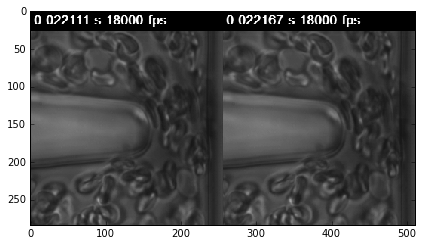

In [1]:
# %load red_Cell.py
import openpiv.tools
import openpiv.process
import openpiv.scaling
import numpy as np
from skimage import data, io, filters
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import feature
from PIL import Image
from pylab import *
%matplotlib inline

from skimage.color import rgb2gray
from skimage import img_as_uint

frame_a  = io.imread('Y4-S3_Camera000398.tif')  
frame_b  = io.imread('Y4-S3_Camera000399.tif')


# for whatever reason the shape of frame_a is (3, 284, 256)
# so we first tranpose to the RGB image and then convert to the gray scale

frame_a = img_as_uint(rgb2gray(frame_a))
frame_b = img_as_uint(rgb2gray(frame_b))


#matshow ( frame_a, cmap=cm.Greys_r )
#mage = data.coins() # or any NumPy array!
io.imshow(np.c_[frame_a,frame_b])


In [2]:
#u, v, sig2noise = openpiv.process.extended_search_area_piv( frame_a, frame_b, window_size=24, overlap=12, dt=0.02, search_area_size=64, sig2noise_method='peak2peak' )
u, v, sig2noise = openpiv.pyprocess.piv( frame_a, frame_b, window_size=32, overlap=8, dt=.1, sig2noise_method='peak2peak' )
x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=32, overlap=8 )

In [3]:
frame_a.dtype

dtype('uint16')

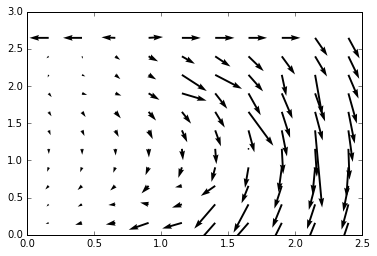

In [4]:
u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v = openpiv.filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = openpiv.scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
quiver(x,y,u,v)

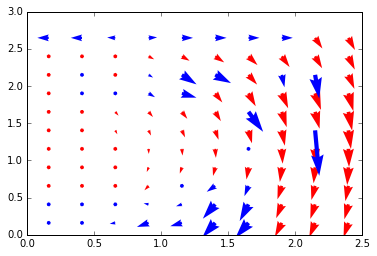

In [5]:
openpiv.tools.save(x, y, u, v, mask, 'Y4-S3_Camera000398.txt' )
openpiv.tools.display_vector_field('Y4-S3_Camera000398.txt', scale=3, width=0.0125)
# frame_vectors  = io.imshow(vectors)

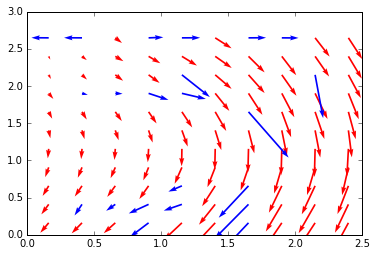

In [6]:
u, v, sig2noise = openpiv.process.extended_search_area_piv(frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=32, overlap=8, dt=0.02, search_area_size=64, sig2noise_method='peak2peak' )
x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=32, overlap=8 )
u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v = openpiv.filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = openpiv.scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
openpiv.tools.save(x, y, u, v, mask, 'Y4-S3_Camera000398.txt' )
openpiv.tools.display_vector_field('Y4-S3_Camera000398.txt', scale=10, width=0.005)

In [7]:
x,y,u,v, mask = openpiv.process.WiDIM( frame_a.astype(np.int32), frame_b.astype(np.int32), ones_like(frame_a).astype(np.int32), min_window_size=16, overlap_ratio=0.25, coarse_factor=2, dt=0.02, validation_method='mean_velocity', trust_1st_iter=1, validation_iter=2, tolerance=0.7, nb_iter_max=4, sig2noise_method='peak2peak')

/Users/alex/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: deprecated
  if __name__ == '__main__':
/Users/alex/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
Algorithm :  WiDIM
 
Parameters   
-----------------------------------
      Size of image  |  [284, 256]
      total number of iterations  |  4
      overlap ratio  |  0.25
      coarse factor  |  2
      time step  |  0.019999999553
      validation method  |  mean_velocity
      number of validation iterations  |  2
      subpixel_method  |  gaussian
      Nrow  |  [ 5 11 23 23]
      Ncol  |  [ 5 10 21 21]
      Window sizes  |  [64 32 16 16]
-----------------------------------
|           STARTING              |
-----------------------------------
 
///////////////////////////////

Computing the displacements : 100% [----------------] Time: 0:00:00 155.21  B/s
Performing interpolations : 100% [------------------] Time: 0:00:00  29.51 kB/s


..[DONE]
 --residual :  1.00000001255
no validation : trusting 1st iteration
going to next iteration.. 
performing interpolation of the displacement field
 
..[DONE] -----> going to iteration  1
 
 
//////////////////////////////////////////////////////////////////
 
ITERATION #  1
 


Computing the displacements : 100% [----------------] Time: 0:00:00 124.79  B/s


..[DONE]
 --residual :  0.227272730125
Starting validation..
Validation, iteration number  0
 
Validation, iteration number  1
 
..[DONE]
 
going to next iteration.. 
performing interpolation of the displacement field
 
..[DONE] -----> going to iteration  2
 
 
//////////////////////////////////////////////////////////////////
 
ITERATION #  2
 


Validation : 100% [---------------------------------] Time: 0:00:00   2.62 kB/s
Performing interpolations : 100% [------------------] Time: 0:00:00   3.37 kB/s
Computing the displacements : 100% [----------------] Time: 0:00:00 108.23  B/s
Validation : 100% [---------------------------------] Time: 0:00:00   1.03 kB/s
Performing interpolations : 100% [------------------] Time: 0:00:00  70.78 kB/s


..[DONE]
 --residual :  0.642911634961
Starting validation..
Validation, iteration number  0
 
Validation, iteration number  1
 
..[DONE]
 
going to next iteration.. 
performing interpolation of the displacement field
 
..[DONE] -----> going to iteration  3
 
 
//////////////////////////////////////////////////////////////////
 
ITERATION #  3
 


Computing the displacements : 100% [----------------] Time: 0:00:00 101.59  B/s


..[DONE]
 --residual :  0.632014827589
Starting validation..
Validation, iteration number  0
 
Validation, iteration number  1
 
..[DONE]
 
//////////////////////////////////////////////////////////////////
end of iterative process.. Re-arranging vector fields..
...[DONE]
-------------------------------------------------------------
[DONE] ..after  24.9742519855 seconds 
-------------------------------------------------------------


Validation : 100% [---------------------------------] Time: 0:00:00   1.53 kB/s


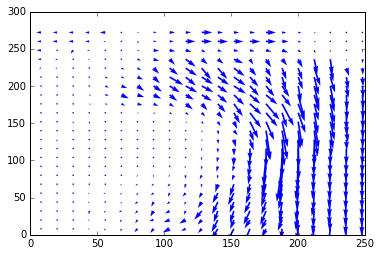

In [8]:
openpiv.tools.save(x, y, u, v, zeros_like(u), 'Y4-S3_Camera000398.txt' )
openpiv.tools.display_vector_field('Y4-S3_Camera000398.txt', scale=3000, width=0.005)